In [3]:
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.datasets import fetch_california_housing, load_iris, load_wine, load_boston
from sklearn.model_selection import cross_val_score, ParameterSampler
from scipy.stats.distributions import uniform, randint
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

In [4]:
data = fetch_california_housing()
x = pd.DataFrame(data['data'])
y = pd.DataFrame(data['target'])

#shuffle data
x = x.sample(n=x.shape[0], random_state=42)
y = y.loc[x.index]

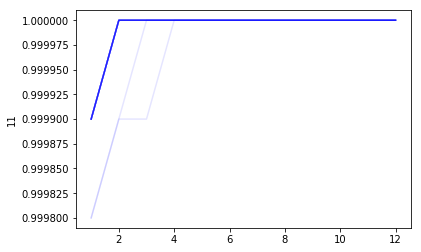

In [31]:
for i in tqdm_notebook(range(20)):
    params_distribution = {'n_estimators': randint(2,100),
                           'max_depth': randint(2,200),
                           'learning_rate': uniform(.001, .2),
                           'colsample_bytree': uniform(.5, 0.5),
                           'num_leaves': randint(2,100)}

    ps = ParameterSampler(params_distribution, 100, random_state=i)
    model = LGBMRegressor()
    cross_val_scores_list = []

    for params in ps:

        model.set_params(**params)

        cross_val_scores = cross_val_score(model, x, y, cv=8, scoring='neg_mean_squared_error')
        cross_val_scores_list.append(cross_val_scores)

    scores_array = np.array(cross_val_scores_list)
    scores_cumulative = [scores_array[:,:i+1].mean(axis=1) for i in range(12)]
    scores_cumulative = np.array(scores_cumulative)

    corrs = pd.DataFrame(np.corrcoef(scores_cumulative).round(4))

    sns.lineplot(x=range(1,13), y=corrs.iloc[:,-1], color='blue', alpha=0.1, );

In [17]:
wine = load_wine()
x_wine = pd.DataFrame(wine['data'])
y_wine = pd.Series(wine['target'])

x_wine = x_wine.sample(n=x_wine.shape[0], random_state=42)
y_wine = y_wine.loc[x_wine.index]

In [33]:
for i in tqdm_notebook(range(20)):

    params_distribution = {'n_estimators': randint(2,100),
                           'max_depth': randint(2,200),
                           'learning_rate': uniform(.001, .2),
                           'colsample_bytree': uniform(.5, 0.5),
                           'num_leaves': randint(2,100)}

    ps = ParameterSampler(params_distribution, 100, random_state=i)
    model = LGBMClassifier()
    cross_val_scores_list = []

    for params in ps:

        model.set_params(**params)

        cross_val_scores = cross_val_score(model, x_wine, y_wine, cv=8, scoring='neg_mean_squared_error')
        cross_val_scores_list.append(cross_val_scores)

    scores_array = np.array(cross_val_scores_list)
    scores_cumulative = [scores_array[:,:i+1].mean(axis=1) for i in range(8)]
    scores_cumulative = np.array(scores_cumulative)

    corrs = pd.DataFrame(np.corrcoef(scores_cumulative).round(4), 
                         columns=[i for i in range(1,9)], 
                         index=[i for i in range(1,9)])

    sns.lineplot(x=range(1,13), y=corrs.iloc[:,-1], color='blue', alpha=0.1, );

ValueError: array length 12 does not match index length 8

In [21]:
boston = load_boston()

x_boston = pd.DataFrame(boston['data'])
y_boston = pd.Series(boston['target'])

x_boston = x_boston.sample(n=x_boston.shape[0], random_state=42)
y_boston = y_boston.loc[x_boston.index]

In [23]:
params_distribution = {'n_estimators': randint(2,100),
                       'max_depth': randint(2,200),
                       'learning_rate': uniform(.001, .2),
                       'colsample_bytree': uniform(.5, 0.5),
                       'num_leaves': randint(2,100)}

ps = ParameterSampler(params_distribution, 500, random_state=42)
model = LGBMRegressor()
cross_val_scores_list = []

for params in tqdm_notebook(ps):
    
    model.set_params(**params)

    cross_val_scores = cross_val_score(model, x_boston, y_boston, cv=8, scoring='neg_mean_squared_error')
    cross_val_scores_list.append(cross_val_scores)

scores_array = np.array(cross_val_scores_list)
scores_cumulative = [scores_array[:,:i+1].mean(axis=1) for i in range(8)]
scores_cumulative = np.array(scores_cumulative)

corrs = pd.DataFrame(np.corrcoef(scores_cumulative).round(4), 
                     columns=[i for i in range(1,9)], 
                     index=[i for i in range(1,9)])
corrs

,1,2,3,4,5,6,7,8
1,1.0000,0.9971,0.9968,0.9982,0.9986,0.9988,0.9988,0.9986
2,0.9971,1.0000,0.9998,0.9996,0.9993,0.9990,0.9991,0.9992
3,0.9968,0.9998,1.0000,0.9995,0.9993,0.9990,0.9990,0.9992
4,0.9982,0.9996,0.9995,1.0000,0.9999,0.9998,0.9998,0.9999
5,0.9986,0.9993,0.9993,0.9999,1.0000,0.9999,0.9999,0.9999
6,0.9988,0.9990,0.9990,0.9998,0.9999,1.0000,1.0000,0.9999
7,0.9988,0.9991,0.9990,0.9998,0.9999,1.0000,1.0000,0.9999
8,0.9986,0.9992,0.9992,0.9999,0.9999,0.9999,0.9999,1.0000


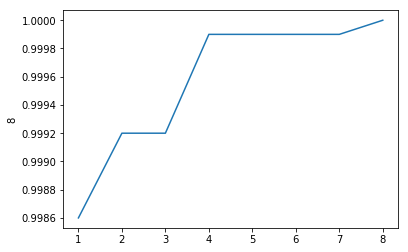

In [24]:
sns.lineplot(x=range(1,9), y=corrs.iloc[:,-1]);